# 1. Importing required library

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import utils
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# 2. Read dataset

In [59]:
df = pd.read_csv('/content/spam.csv', delimiter=',', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 3. Pre-processing

Before pre-processing.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Removing the unwanted columns.

In [61]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

After pre-processing.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

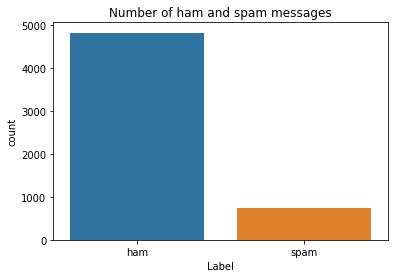

In [63]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

Labeling the columns.

In [64]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

Split dataset for training and testing.

In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

Padding the words to get equal length for all words in a sentence.

In [66]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = utils.pad_sequences(sequences,maxlen=max_len)
sequences_matrix = np.reshape(sequences_matrix,(4736,150,1))

# 4. Creating model

In [67]:
model = Sequential()

# 5. Adding Layers

In [68]:
model.add(Embedding(max_words,50,input_length=max_len))

In [69]:
model.add(LSTM(units=64,input_shape = (sequences_matrix.shape[1],1),return_sequences=True))

In [70]:
model.add(LSTM(units=64,return_sequences=True))

In [71]:
model.add(LSTM(units=64,return_sequences=True))

In [72]:
model.add(LSTM(units=64))

In [73]:
model.add(Dense(units = 256,activation = 'relu'))

In [74]:
model.add(Dense(units = 1,activation = 'sigmoid'))

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_8 (LSTM)               (None, 150, 64)           29440     
                                                                 
 lstm_9 (LSTM)               (None, 150, 64)           33024     
                                                                 
 lstm_10 (LSTM)              (None, 150, 64)           33024     
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dense_5 (Dense)             (None, 256)               16640     
                                                                 
 dense_6 (Dense)             (None, 1)                

# 6. Compiling the model

In [76]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

# 7. Fit the model

In [77]:
M = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,validation_split=0.2)

Epoch 1/5
30/30 [==============================] - 42s 1s/step - loss: 0.3160 - accuracy: 0.8999 - val_loss: 0.1408 - val_accuracy: 0.9515
Epoch 2/5
30/30 [==============================] - 35s 1s/step - loss: 0.0850 - accuracy: 0.9762 - val_loss: 0.0879 - val_accuracy: 0.9768
Epoch 3/5
30/30 [==============================] - 35s 1s/step - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0819 - val_accuracy: 0.9810
Epoch 4/5
30/30 [==============================] - 35s 1s/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.1007 - val_accuracy: 0.9789
Epoch 5/5
30/30 [==============================] - 32s 1s/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0998 - val_accuracy: 0.9821


# 8. Save the model

In [78]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f43baef1b50>>

# 9. Test the model

In [79]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = utils.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 5s 88ms/step - loss: 0.0695 - accuracy: 0.9856


# 10. Accuracy and Loss graph

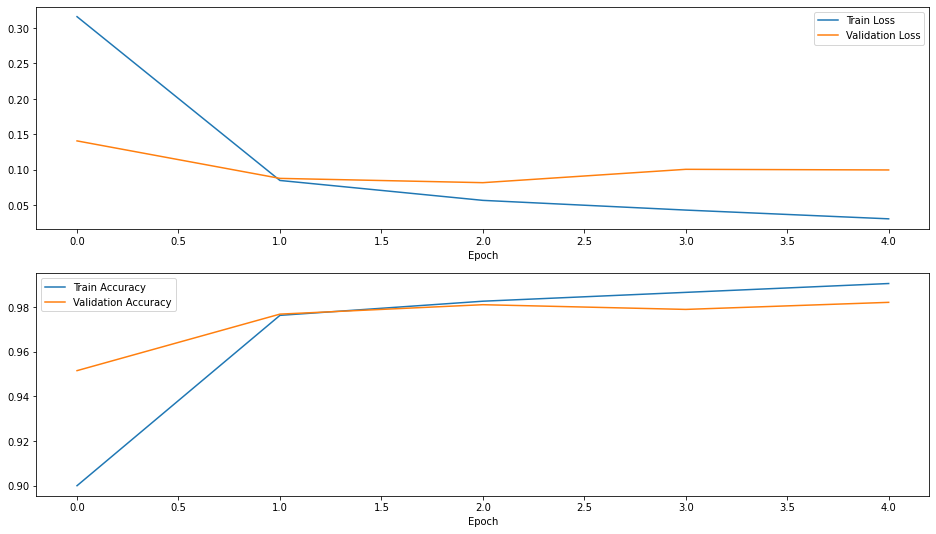

In [80]:
results = pd.DataFrame({"Train Loss": M.history['loss'], 
                        "Validation Loss": M.history['val_loss'],
                        "Train Accuracy": M.history['accuracy'], 
                        "Validation Accuracy": M.history['val_accuracy']
                      })
fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
results[["Train Loss", "Validation Loss"]].plot(ax=ax[0])
results[["Train Accuracy", "Validation Accuracy"]].plot(ax=ax[1])
ax[0].set_xlabel("Epoch")
ax[1].set_xlabel("Epoch")
plt.show()